<h1> Análise: Top 50 Spotify Songs - 2019</h1>

PS: Ainda não sei tratar os dados e trabalhar muito com plots, o objetivo desse notebook é apenas **praticar** e exibir os dados que busquei

In [73]:
#Importando o pandas
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carregando o dataset
sp = pd.read_csv('top50.csv')

In [3]:
#Visualizando as primeiras linhas do dataset
sp.head().head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [56]:
#Verificando o tamanho do dataset
sp.shape[0]

50

In [57]:
#Verificando as informações relevantes sobre o dataset, colunas, tipo dos dados, se existe valores nulos e etc
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 4.9+ KB


<h3>Atristas que mais apareceram no TOP50</h3>

Abaixo temos uma lista com os 5 cantores mais ouvidos

In [58]:
#Filtrando os artistas que mais aparecem (Apenas o top 5)
sp['Artist.Name'].value_counts().iloc[:5]

Ed Sheeran       4
Billie Eilish    2
Marshmello       2
Sech             2
J Balvin         2
Name: Artist.Name, dtype: int64

Ed Sheeran teve 4 músicas no top 50, o dobro em relação aos outros cantores

<h3>Generos que mais tocaram</h3>

In [94]:
#Filtrando apenas os gênero que mais aparecem (Apenas o top 5)
sp['Genre'].value_counts().iloc[:5]

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
Name: Genre, dtype: int64

Os gêneros Dance Pop e Pop tiveram várias músicas no rank. 
As duas juntas apresentam cerca de 30% do total

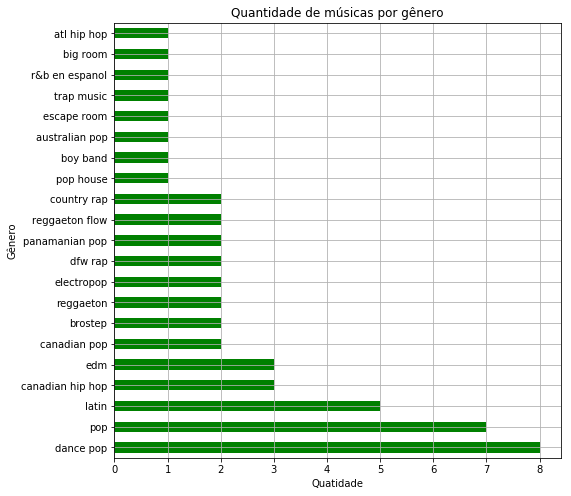

In [114]:
#Grafico exibindo os generos
sp['Genre'].value_counts().plot(kind='barh', figsize=(8,8), color='green', grid=True)
plt.title('Quantidade de músicas por gênero')
plt.ylabel('Gênero')
plt.xlabel('Quatidade')
plt.show()

O gráfico acima exibe a quantidade das músicas em cada gênero

<h4>Representação em porcentagem de cada estilo</h4>

In [93]:
lista =[]
lista_generos = []

[lista.append(sp['Genre'].value_counts()[i]) for i in range(0,sp['Genre'].value_counts().count())]
       
lista_porcentagem = list(map(lambda x: (x/50)*100,lista))

[lista_generos.append(sp['Genre'].value_counts().index[i]) for i in range(0,len(lista))]
    
dict_gen_per = dict(zip(lista_generos,lista_porcentagem))

df_gen_per = pd.Series(dict_gen_per)

df_gen_per

dance pop           16.0
pop                 14.0
latin               10.0
canadian hip hop     6.0
edm                  6.0
canadian pop         4.0
brostep              4.0
reggaeton            4.0
electropop           4.0
dfw rap              4.0
panamanian pop       4.0
reggaeton flow       4.0
country rap          4.0
pop house            2.0
boy band             2.0
australian pop       2.0
escape room          2.0
trap music           2.0
r&b en espanol       2.0
big room             2.0
atl hip hop          2.0
dtype: float64

<h4>Artista a Gênero agrupados</h4>

Abaixo é possivel ver quais artistas estão em cada gênero e quantas cações possuem

In [146]:
#Dados de artista e Genero agrupados usando pivot_table
sp.pivot_table('Unnamed: 0',index=['Genre','Artist.Name'],aggfunc='count',margins=True)

Unnamed: 0
Genre            Artist.Name                 
atl hip hop      Young Thug                 1
australian pop   Tones and I                1
big room         Martin Garrix              1
boy band         Jonas Brothers             1
brostep          Marshmello                 2
canadian hip hop Ali Gatie                  1
                 Drake                      1
                 Y2K                        1
canadian pop     Shawn Mendes               2
country rap      Lil Nas X                  2
dance pop        Ariana Grande              2
                 Chris Brown                1
                 DJ Snake                   1
                 Katy Perry                 1
                 Lady Gaga                  1
                 Lauv                       1
                 Taylor Swift               1
dfw rap          Post Malone                2
edm              Kygo                       1
                 The Chainsmokers           2
electropop       Billie Eilish              2
escape room      Lizzo                      1
latin            Daddy Yankee               1
                 J Balvin                   2
                 Lunay                      1
                 Nicky Jam                  1
panamanian pop   Sech                       2
pop              Ed Sheeran                 4
                 Khalid                     1
                 Lewis Capaldi              1
                 Sam Smith                  1
pop house        MEDUZA                     1
r&b en espanol   ROSALÍA                    1
reggaeton        Bad Bunny                  1
                 Maluma                     1
reggaeton flow   Anuel AA                   1
                 Jhay Cortez                1
trap music       Lil Tecca                  1
All                                        50

<h3>A música com maior duração</h3>

Abaixo temos uma seleção da música com maior duração

In [61]:
#Filtro a colula com o tamanho(Length) e comparo com o tamanho(Length) máximo. armazeno em uma variável
minMax = sp[sp['Length.'] == sp['Length.'].max()]
#Imprime apenas as informações relacionadas ao cantor da música e sua duração
minMax[['Artist.Name','Track.Name','Length.']]

,Artist.Name,Track.Name,Length.
22,Jhay Cortez,No Me Conoce - Remix,309


In [118]:
#Procuto pelo nome do artista e vejo quantas vezes ele aparece
cont = sp[sp['Artist.Name'] == 'Jhay Cortez']['Artist.Name'].count()
print('Jhay Cortez teve apenas {} música na listagem'.format(cont))

Jhay Cortez teve apenas 1 música na listagem


In [141]:
#Imprime a duração da música em minutos
duracao=minMax['Length.']/60
print('Duração da música: {} min'.format(str(duracao).split()[1]))

Duração da música: 5.15 min


<h3>A música com menor duração</h3>

Abaixo temos uma seleção da música com menor duração

In [64]:
#Filtro a colula com o tamanho(Length) e comparo com o tamanho(Length) mínimo. armazeno em uma variável
minMin = sp[sp['Length.'] == sp['Length.'].min()]
#Imprime apenas as informações relacionadas ao cantor da música e sua duração
minMin[['Artist.Name','Track.Name','Length.']]

,Artist.Name,Track.Name,Length.
21,Lil Nas X,Panini,115


In [119]:
#Procuto pelo nome do artista e vejo quantas vezes ele aparece
cont = sp[sp['Artist.Name']=='Lil Nas X']['Artist.Name'].count()
print('Lil Nas X Teve {} músicas na listagem'.format(cont))

Lil Nas X Teve 2 músicas na listagem


In [143]:
#Imprime a duração da música em minutos
duracao=minMin['Length.']/60
#transformei de Series para string, fatiei e peguei apenas a posição referente ao tamanho
#e transformei em float
print('Duração da música: {:.2f} min'.format(float(str(duracao).split()[1])))

Duração da música: 1.92 min


<h3>Mostra a duração média das músicas por gênero</h3>

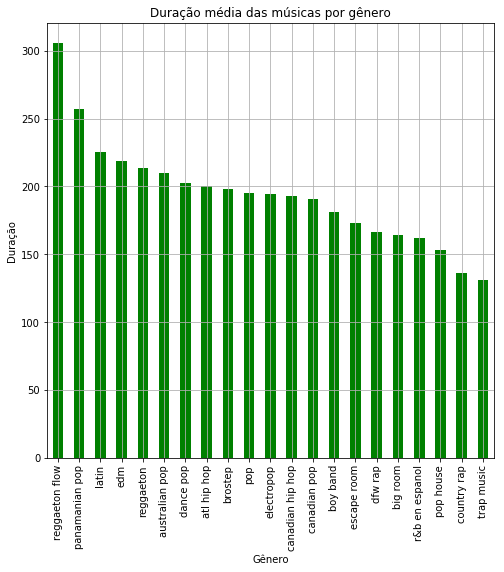

In [113]:
#Agrupa as músicas pelo gênero, seleciona o tamanho e tira a média
mediaGenero = sp.groupby('Genre')['Length.'].mean()
#Imprime os resultado
mediagen = mediaGenero.sort_values(ascending=False)

#Grafico mostrando a duração média por genero
mediagen.plot(kind='bar', figsize=(8,8), color='green',grid=True)
plt.ylabel('Duração')
plt.xlabel('Gênero')
plt.title("Duração média das músicas por gênero")
plt.show()

As músicas do genero reggaeton flow são as mais longas, tendo em média 5 minutos

<h3>Canções mais Populares</h3>

In [115]:
#Lista as canções mais populares mostrando o nome do cantor e ordenando por popularidade
sp[['Popularity','Track.Name','Artist.Name']].sort_values(by='Popularity',ascending=False).iloc[0:5]

,Popularity,Track.Name,Artist.Name
9,95,bad guy,Billie Eilish
4,94,Goodbyes (Feat. Young Thug),Post Malone
10,93,Callaita,Bad Bunny
14,92,Money In The Grave (Drake ft. Rick Ross),Drake
1,92,China,Anuel AA


Acima temos as 5 canções com maior popularidade

<h3>TOP 5 Mais dançantes</h3>

In [237]:
#Filtrando as mais dançantes
sp[['Danceability','Track.Name']].sort_values(by='Danceability',ascending=False).iloc[:5]

,Danceability,Track.Name
43,90,Talk
44,88,Con Altura
8,88,Old Town Road - Remix
38,84,Sucker
18,84,Lalala


Acima temos as 5 musicas mais daçantes